In [22]:
import analyse_to_pdf
import os
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytz
import pa_mines

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
# convert all files to h5
import bag_to_h5_to_measurement

data_folder = "/home/emil/data/PA_mines"
data_folder = "/mnt/d/PA_mines/"
miniprism_folder = "miniprism"
minip_abs_folder = os.path.join(data_folder, miniprism_folder)
_ = bag_to_h5_to_measurement.subfolders_to_h5(minip_abs_folder, miniprism=True)
nglamp_folder = "nglamp"
nglamp_abs_folder = os.path.join(data_folder, nglamp_folder)
_ = bag_to_h5_to_measurement.subfolders_to_h5(nglamp_abs_folder, miniprism=False)

Found data.bag.h5 file in /mnt/d/PA_mines/miniprism/2024_05_06_13_53_35
Found data.bag.h5 file in /mnt/d/PA_mines/miniprism/2024_05_06_14_25_28
Found data.bag.h5 file in /mnt/d/PA_mines/miniprism/2024_05_06_14_30_14
Found data.bag.h5 file in /mnt/d/PA_mines/miniprism/2024_05_07_11_04_54
Found data.bag.h5 file in /mnt/d/PA_mines/miniprism/2024_05_07_11_42_55
Found data.bag.h5 file in /mnt/d/PA_mines/miniprism/2024_05_07_11_56_56
Found data.bag.h5 file in /mnt/d/PA_mines/miniprism/2024_05_07_12_33_06
No .bag, .bag.active, or .h5 file found in /mnt/d/PA_mines/miniprism/2024_05_07_11_56_56/BQ Plots
Found data.bag.h5 file in /mnt/d/PA_mines/nglamp/2024_05_06_12_21_56
Found data.bag.h5 file in /mnt/d/PA_mines/nglamp/2024_05_06_13_05_59
Found data.bag.h5 file in /mnt/d/PA_mines/nglamp/2024_05_06_13_10_43
Found data.bag.h5 file in /mnt/d/PA_mines/nglamp/2024_05_06_13_24_32
Found data.bag.h5 file in /mnt/d/PA_mines/nglamp/2024_05_06_13_46_58
Found data.bag.h5 file in /mnt/d/PA_mines/nglamp/2024

In [24]:
data_folder = os.path.expanduser("~/data/PA_mines")
gps_df = pa_mines.read_gps_csvs(os.path.join(data_folder, "yuxin_drone_gps"))

Reading /mnt/d/PA_mines/miniprism/2024_05_06_13_53_35/data.bag.h5
Reading /mnt/d/PA_mines/miniprism/2024_05_06_14_25_28/data.bag.h5
Reading /mnt/d/PA_mines/miniprism/2024_05_06_14_30_14/data.bag.h5
Reading /mnt/d/PA_mines/miniprism/2024_05_07_11_04_54/data.bag.h5
Reading /mnt/d/PA_mines/miniprism/2024_05_07_11_42_55/data.bag.h5
Reading /mnt/d/PA_mines/miniprism/2024_05_07_11_56_56/data.bag.h5
Reading /mnt/d/PA_mines/miniprism/2024_05_07_12_33_06/data.bag.h5


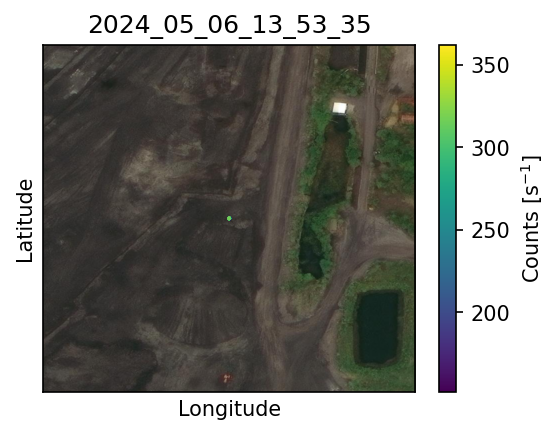

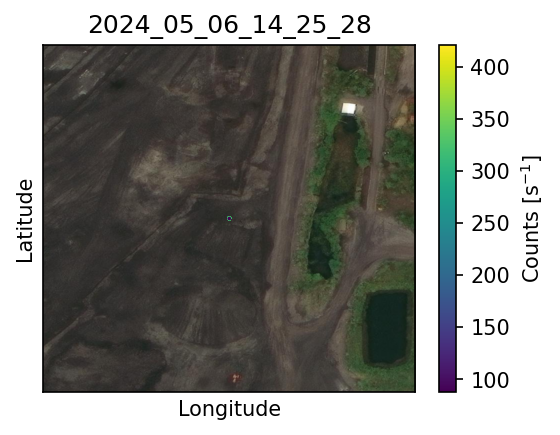

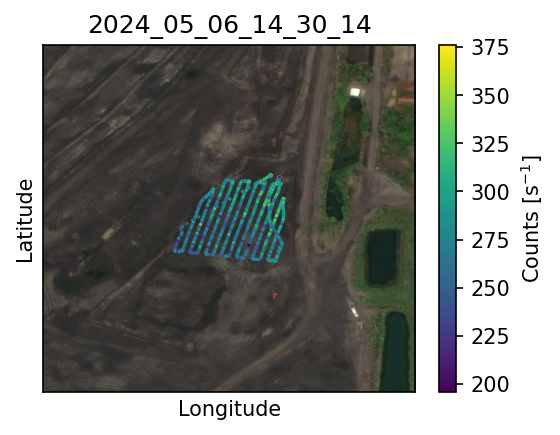

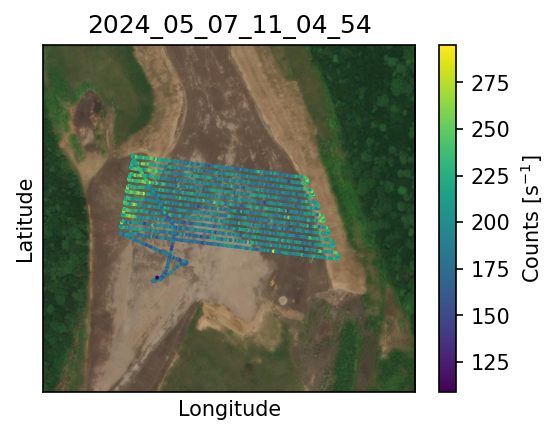

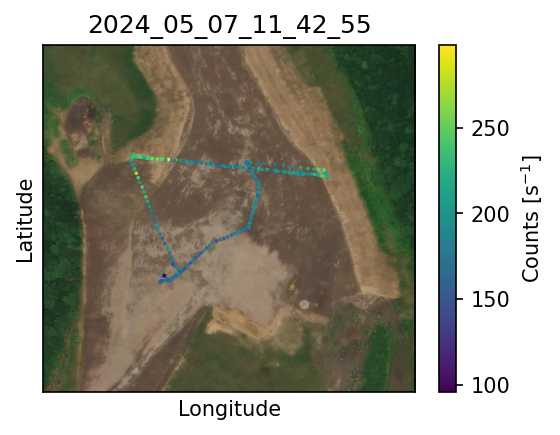

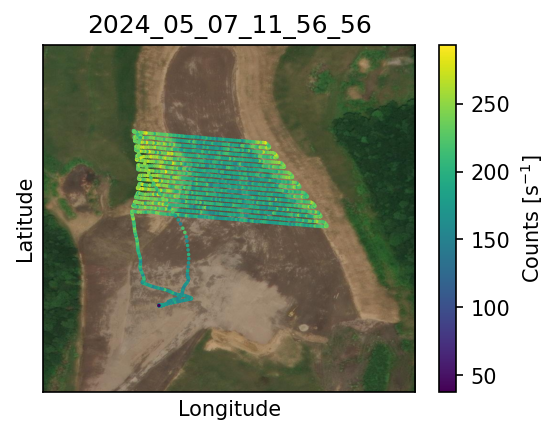

In [76]:
data_folder = "/mnt/d/PA_mines/"
exclude_runs = ['/mnt/d/PA_mines/nglamp/2024_05_02_20_44_09/data.bag.h5',
                '/mnt/d/PA_mines/nglamp/2024_05_02_20_44_09/data.bag.h5',
                '/mnt/d/PA_mines/miniprism/2024_05_07_12_33_06/data.bag.h5']

mp_df = pa_mines.read_all_h5_files(os.path.join(data_folder, "miniprism"), exclude_runs=exclude_runs)
for run_name in mp_df.run.unique():
    pa_mines.plot_counts(
        mp_df.query(f'run == "{run_name}"'),
        gps_df,
        normalize=False,
        zoom_out=0.001,
        title=run_name,
    )

Keys: <KeysViewHDF5 ['arrays', 'scalars']>
Keys: <KeysViewHDF5 ['arrays', 'scalars']>
Keys: <KeysViewHDF5 ['arrays', 'scalars']>
Keys: <KeysViewHDF5 ['arrays', 'scalars']>
Keys: <KeysViewHDF5 ['arrays', 'scalars']>
Keys: <KeysViewHDF5 ['arrays', 'scalars']>
Keys: <KeysViewHDF5 ['arrays', 'scalars']>
Keys: <KeysViewHDF5 ['arrays', 'scalars']>
Keys: <KeysViewHDF5 ['arrays', 'scalars']>
Keys: <KeysViewHDF5 ['arrays', 'scalars']>
Keys: <KeysViewHDF5 ['arrays', 'scalars']>
Keys: <KeysViewHDF5 ['arrays', 'scalars']>
Keys: <KeysViewHDF5 ['arrays', 'scalars']>
Keys: <KeysViewHDF5 ['arrays', 'scalars']>
Plotting 2024_05_02_20_38_59


/home/emil/repos/autonomy_analysis/pa_mines.py:131: UserWarning: Interpolation is being attempted outside of the range of the original data.
  if times.min() < df.index.min() or times.max() > df.index.max():


ValueError: Axis limits cannot be NaN or Inf

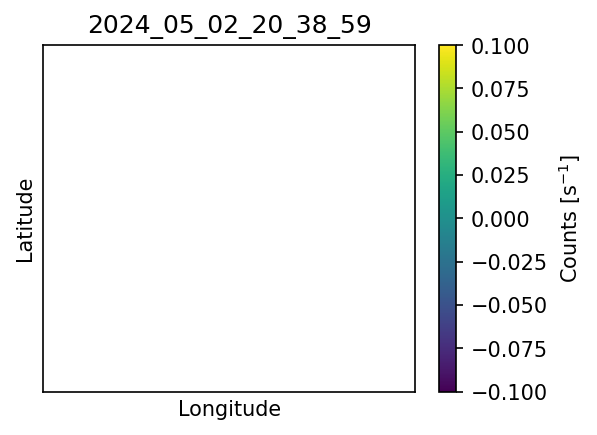

In [38]:
exclude_runs = ['/mnt/d/PA_mines/nglamp/2024_05_02_20_44_09/data.bag.h5',
                '/mnt/d/PA_mines/nglamp/2024_05_02_20_44_09/data.bag.h5']

ng_df = pa_mines.read_all_h5_files(os.path.join(data_folder, "nglamp"), exclude_runs=exclude_runs)
for run_name in ng_df.run.unique():
    print(f"Plotting {run_name}")
    pa_mines.plot_counts(
        ng_df.query(f'run == "{run_name}"'),
        gps_df,
        time_step=0.5,
        time_window=10,
        normalize=False,
        zoom_out=0.0005,
        title=run_name,
    )

In [48]:
import glob

spectrometer_folder = os.path.expanduser("~/data/PA_mines/spectrometer")


# Find all CSV files that do not have '_header' in the filename
csv_files = glob.glob(os.path.join(spectrometer_folder, "*.csv"))
csv_files = [f for f in csv_files if "_header" not in os.path.basename(f)]

# Load them into a long DataFrame
df_spectrometer = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
df_spectrometer['unix_time'] = pd.to_datetime(df_spectrometer['Time']).dt.tz_localize('America/Los_Angeles').dt.tz_convert('UTC').astype(np.int64) // 10**9


In [49]:
df_spectrometer

Time  \
0      2024-05-06 13:29:59.260770   
1      2024-05-06 13:29:59.393765   
2      2024-05-06 13:29:59.526772   
3      2024-05-06 13:29:59.659855   
4      2024-05-06 13:29:59.792990   
...                           ...   
51401  2024-05-06 09:20:51.609695   
51402  2024-05-06 09:20:51.742880   
51403  2024-05-06 09:20:51.876008   
51404  2024-05-06 09:20:52.009151   
51405  2024-05-06 09:20:52.142271   

                                             Intensities Date-Time   unix_time  
0      [-2343.0785185185186, 27011.747037037036, -49....       NaN  1715027399  
1      [-2339.6804074074075, 27015.14514814815, 12.29...       NaN  1715027399  
2      [-2362.010851851852, 26992.814703703705, 9.385...       NaN  1715027399  
3      [-2361.201777777778, 26993.62377777778, -62.62...       NaN  1715027399  
4      [-2353.4346666666665, 27001.39088888889, -35.4...       NaN  1715027399  
...                                                  ...       ...         ...  
51401  [-2189.678074074074, 27165.147481481483, -19.7...       NaN  1715012451  
51402  [-2190.487148148148, 27164.338407407406, -100....       NaN  1715012451  
51403  [-2196.959740740741, 27157.865814814813, -22.1...       NaN  1715012451  
51404  [-2202.7850740740737, 27152.040481481483, 8.41...       NaN  1715012452  
51405  [-2192.590740740741, 27162.234814814816, -44.4...       NaN  1715012452  

[51406 rows x 4 columns]

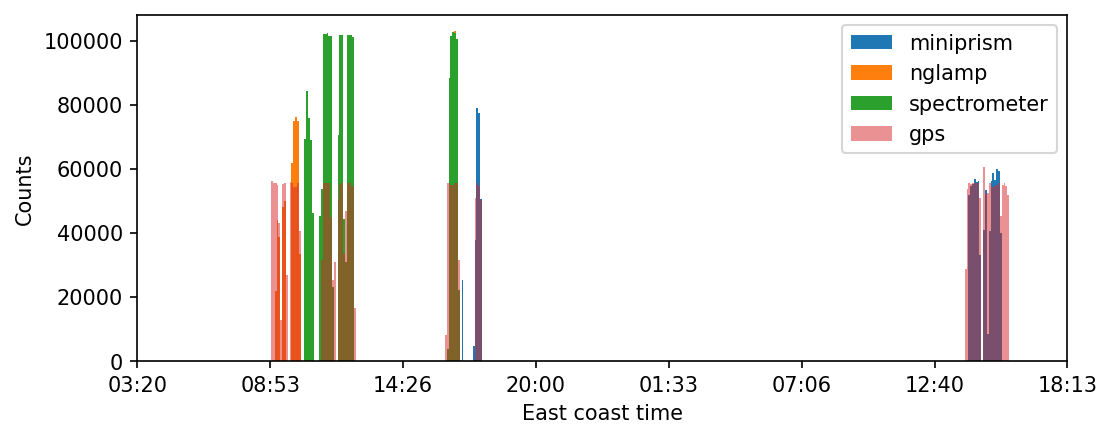

In [77]:
import matplotlib.dates as mdates
import pytz

plt.figure(figsize=(8,3), dpi=150)
bins = np.linspace(mp_df.ts.min(), mp_df.ts.min()+3600, 100)
bins = np.linspace(gps_df.index.min(), gps_df.index.min()+3600, 100)
bins = np.linspace(gps_df.index.min(), gps_df.index.max(), 400)

mp_df.ts.hist(bins=bins, label="miniprism", grid=False)
ng_df.ts.hist(bins=bins, label="nglamp", grid=False)
df_spectrometer.unix_time.hist(bins=bins, weights=np.ones_like(df_spectrometer.unix_time) * 50, label="spectrometer", grid=False)
_ = plt.hist(gps_df.index.values, bins=bins, label="gps", weights=np.ones_like(gps_df.index.values) * 1e2, alpha=0.5)

# Convert Unix timestamps to datetime objects in New York time
x_ticks = plt.gca().get_xticks()
x_labels = pd.to_datetime(x_ticks, unit='s').tz_localize('UTC').tz_convert('America/New_York').strftime('%H:%M')

# Format x-axis as 'HH:MM'
plt.gca().set_xticks(x_ticks)
plt.gca().set_xticklabels(x_labels)

plt.xlabel("East coast time")
plt.ylabel("Counts")
plt.legend()

In [81]:
mp_df['system'] = "miniprism"
ng_df['system'] = "nglamp"
df_both = pd.concat([mp_df, ng_df])
df_both.to_csv("both_systems.csv")

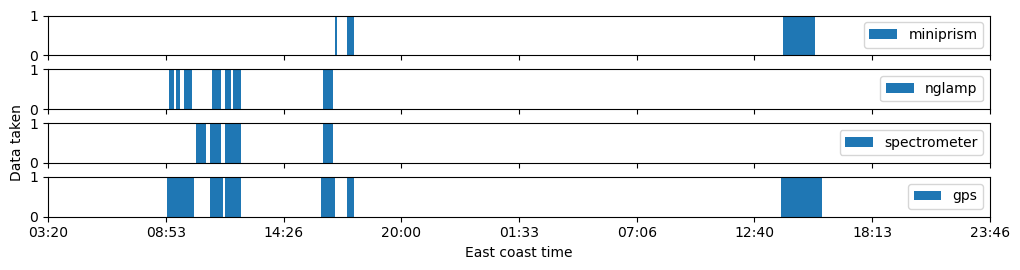

In [78]:
import matplotlib.dates as mdates
import pytz
bins = np.linspace(gps_df.index.min(), gps_df.index.max()+3600*6, 400)

# Create a figure with 4 subplots (1 column, 4 rows)
fig, axs = plt.subplots(4, 1, figsize=(10, 2.5), sharex=True)

# Set the y-limits for all subplots
for ax in axs:
    ax.set_ylim(0, 1)

# Plot each histogram in its own subplot
mp_df.ts.hist(ax=axs[0], bins=bins, label="miniprism", grid=False)
axs[0].legend()

ng_df.ts.hist(ax=axs[1], bins=bins, label="nglamp", grid=False)
axs[1].legend()

df_spectrometer.unix_time.hist(ax=axs[2], bins=bins, weights=np.ones_like(df_spectrometer.unix_time) * 50, label="spectrometer", grid=False)
axs[2].legend()

# Use ax.hist() for the last subplot
axs[3].hist(gps_df.index.values, bins=bins, label="gps", weights=np.ones_like(gps_df.index.values) * 1e2)
axs[3].legend()

# Convert Unix timestamps to datetime objects in New York time
x_ticks = plt.gca().get_xticks()
x_labels = pd.to_datetime(x_ticks, unit='s').tz_localize('UTC').tz_convert('America/New_York').strftime('%H:%M')

# Format x-axis as 'HH:MM'
plt.gca().set_xticks(x_ticks)
plt.gca().set_xticklabels(x_labels)

plt.xlabel("East coast time")
axs[2].set_ylabel("Data taken")
plt.subplots_adjust(hspace=0)
plt.tight_layout(pad=0)



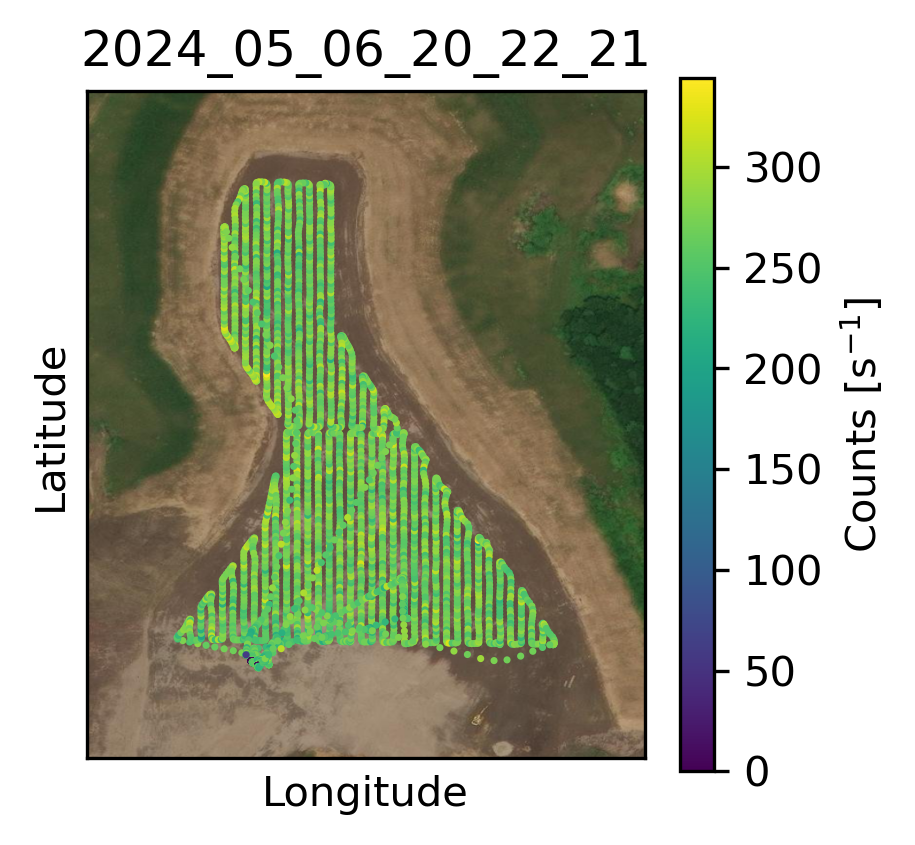

In [18]:
fig, ax = plt.subplots(figsize=(3,3), dpi=300)
pa_mines.plot_counts(
    ng_df.query(f'run != "{ng_df.run.unique()[-1]}"'),
    gps_df,
    time_step=1,
    time_window=10,
    normalize=False,
    zoom_out=0.0005,
    title=run_name,
    ax=ax,
)

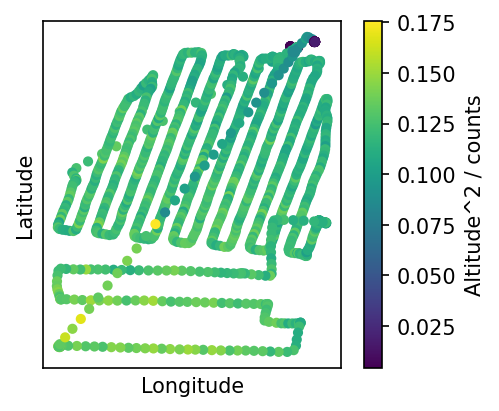

In [57]:
analyse_folder = "nglamp/2024_05_06_20_22_21"
rad_df = pa_mines.read_h5_folder(os.path.join(data_folder, analyse_folder))
pa_mines.plot_counts(rad_df, gps_df)

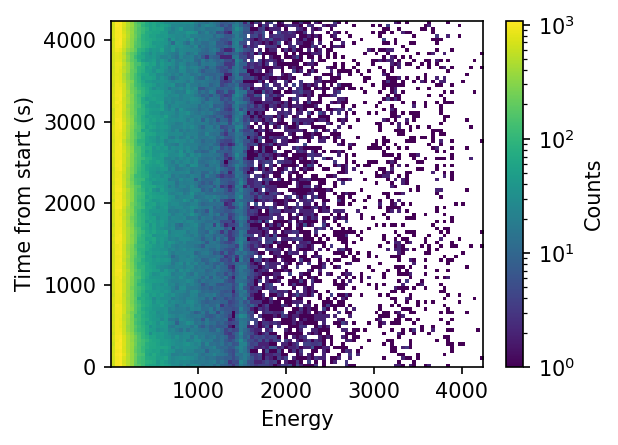

In [48]:
pa_mines.plot_waterfall(rad_df)

# Lidar test

In [15]:
mp_df

energy            ts                  run
0         141.0  1.715031e+09  2024_05_06_14_30_14
1         109.0  1.715031e+09  2024_05_06_14_30_14
2         126.0  1.715031e+09  2024_05_06_14_30_14
3          62.0  1.715031e+09  2024_05_06_14_30_14
4         195.0  1.715031e+09  2024_05_06_14_30_14
...         ...           ...                  ...
1209458   275.0  1.715111e+09  2024_05_07_12_33_06
1209459   362.0  1.715111e+09  2024_05_07_12_33_06
1209460    68.0  1.715111e+09  2024_05_07_12_33_06
1209461    84.0  1.715111e+09  2024_05_07_12_33_06
1209462   118.0  1.715111e+09  2024_05_07_12_33_06

[1209463 rows x 3 columns]

In [17]:
selected_gps_df

datetime        lat        lon     asml  \
ts                                                                           
1.715031e+09  2024-05-06 14:30:16.252000512  40.467195 -78.700481  612.416   
1.715031e+09  2024-05-06 14:30:16.806000896  40.467195 -78.700481  612.424   
1.715031e+09  2024-05-06 14:30:17.262999040  40.467195 -78.700481  612.427   
1.715031e+09  2024-05-06 14:30:17.831000320  40.467195 -78.700481  612.427   
1.715031e+09  2024-05-06 14:30:18.259986176  40.467195 -78.700481  612.433   
...                                     ...        ...        ...      ...   
1.715111e+09  2024-05-07 12:46:31.304000768  40.460000 -78.833309  610.016   
1.715111e+09  2024-05-07 12:46:31.775000064  40.460000 -78.833309  610.024   
1.715111e+09  2024-05-07 12:46:32.304991232  40.460000 -78.833309  610.024   
1.715111e+09  2024-05-07 12:46:32.768999936  40.460000 -78.833309  610.020   
1.715111e+09  2024-05-07 12:46:33.312992256  40.460000 -78.833309  610.019   

                alt  
ts                   
1.715031e+09  0.525  
1.715031e+09  0.533  
1.715031e+09  0.536  
1.715031e+09  0.536  
1.715031e+09  0.542  
...             ...  
1.715111e+09 -3.677  
1.715111e+09 -3.669  
1.715111e+09 -3.669  
1.715111e+09 -3.673  
1.715111e+09 -3.674  

[13854 rows x 5 columns]

In [16]:
min_ts = mp_df.ts.min()
max_ts = mp_df.ts.max()

selected_gps_df = gps_df.loc[min_ts:max_ts]

In [13]:
dfl = pa_mines.read_h5_folder_lidar(os.path.join(data_folder, "nglamp/2024_05_06_20_22_21"))

KeyError: "Unable to open object (object 'velodyne' doesn't exist)"

# Time synchronization

Text(0, 0.5, 'Altitude (m)')

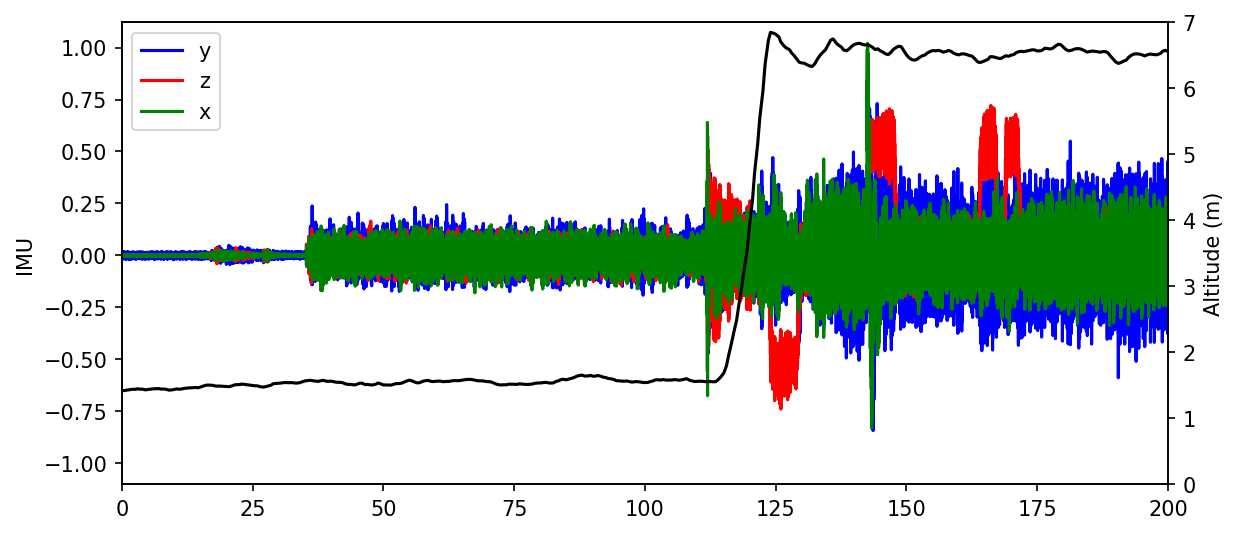

In [38]:
plt.figure(figsize=(9, 4), dpi=150)
plt.plot(imu_t - min(imu_t), imu_y, color="blue", label="y")
plt.plot(imu_t - min(imu_t), imu_z, color="red", label="z")
plt.plot(imu_t - min(imu_t), imu_x, color="green", label="x")
plt.legend(loc="upper left")
plt.ylabel("IMU")
plt.twinx()
plt.plot(gps_df.index.values - min(imu_t), gps_df.alt, color="black")
plt.ylim(0, 7)
plt.xlim(0, 1300)
plt.xlim(0, 200)
plt.xlabel("Time from start (s)")
plt.ylabel("Altitude (m)")